#Lectura y procesamiento de los resultados de los mejores modelos MLP

En el presente archivo se leen los archivos excel que contienen resumenes de los modelos generados con las grillas de MLP. Se procesa dicha información para encontrar los mejores modelos.

In [1]:
# Access files from your Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
cd gdrive/MyDrive/Universidad/2020/Tesis_final/problema2/leer_procesar_modelos_NARX/results/

/content/gdrive/MyDrive/Universidad/2020/Tesis_final/problema2/leer_procesar_modelos_NARX/results


In [3]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import load_model

summaryModelsMLP1S = pd.read_excel('grilla_MLP_NARX_1STEPS.xlsx', header=0)
summaryModelsMLP2S = pd.read_excel('grilla_MLP_NARX_2STEPS.xlsx', header=0)
summaryModelsMLP3S = pd.read_excel('grilla_MLP_NARX_3STEPS.xlsx', header=0)
summaryModelsMLP4S = pd.read_excel('grilla_MLP_NARX_4STEPS.xlsx', header=0)

grilla_MLP_NARX_AQP = pd.concat([summaryModelsMLP1S, summaryModelsMLP2S], ignore_index=True)
grilla_MLP_NARX_AQP = pd.concat([grilla_MLP_NARX_AQP, summaryModelsMLP3S], ignore_index=True)
grilla_MLP_NARX_AQP = pd.concat([grilla_MLP_NARX_AQP, summaryModelsMLP4S], ignore_index=True)

grilla_MLP_NARX_AQP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2052 entries, 0 to 2051
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MAPE                    2052 non-null   float64
 1   delayedSteps            2052 non-null   int64  
 2   nameModel               2052 non-null   object 
 3   nameHistory             2052 non-null   object 
 4   nameConfiguration       2052 non-null   object 
 5   timeTrain (in seconds)  2052 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 96.3+ KB


##La cantidad de modelos generados para el LSTM NARX de DDFO fue de 2051

In [4]:
rslt_df = grilla_MLP_NARX_AQP.sort_values('MAPE')
total = grilla_MLP_NARX_AQP['timeTrain (in seconds)'].sum()
print("Tiempo total: " + str(total))
grilla_MLP_NARX_AQP.describe()

Tiempo total: 196811.3


MAPE  delayedSteps  timeTrain (in seconds)
count  2052.000000   2052.000000             2052.000000
mean     93.556500      2.500000               95.911940
std      16.177471      1.118307                4.831618
min      20.064912      1.000000               44.470000
25%      97.879065      1.750000               94.040000
50%      99.628448      2.500000               95.750000
75%      99.647175      3.250000               97.970000
max     100.378762      4.000000              144.520000

##La cantidad de segundos totales para ejecutar la grilla es aproximadamente 196811, lo que equivale a 54 horas aproximadamente. Además se tienen las estadisticas resumen.

In [5]:
rslt_df.iloc[:45,:]

MAPE  ...  timeTrain (in seconds)
263   20.064912  ...                   89.99
258   21.651105  ...                   89.27
75    22.795654  ...                   88.74
278   22.814908  ...                   90.44
463   23.268120  ...                   95.55
453   23.999550  ...                   95.02
3     24.099648  ...                   89.99
408   24.474701  ...                  100.20
458   25.024529  ...                   92.77
1887  25.407390  ...                   97.55
273   26.455002  ...                   95.52
123   26.699630  ...                   90.18
1992  27.166328  ...                  100.29
393   27.870710  ...                   97.97
1872  27.958981  ...                   96.81
268   28.147000  ...                   90.97
118   28.269715  ...                   90.74
1652  28.986612  ...                   98.53
1877  29.005312  ...                   97.56
966   29.356634  ...                   98.00
1807  29.441576  ...                   96.22
77    29.484597  ...                   90.24
846   29.607086  ...                   96.29
1657  29.871058  ...                   94.77
108   30.496170  ...                   90.18
2007  30.644126  ...                   98.01
1937  30.748562  ...                   99.59
1797  31.081247  ...                   96.49
1647  31.091607  ...                   98.82
771   31.130145  ...                   93.72
786   31.332407  ...                   99.71
262   31.771927  ...                   95.94
398   31.838524  ...                   97.81
348   31.845265  ...                   94.25
1149  31.937646  ...                   95.03
1997  31.938549  ...                  108.03
1304  32.157837  ...                   95.69
338   32.197547  ...                   95.24
1802  32.754505  ...                   95.73
636   32.785134  ...                   93.72
1364  33.373152  ...                   95.23
906   33.503233  ...                   94.50
1611  33.692260  ...                   94.51
621   33.697519  ...                   98.42
981   34.205898  ...                   95.80

[45 rows x 6 columns]

In [6]:
rslt_df.iloc[0,:]

MAPE                                                                20.0649
delayedSteps                                                              1
nameModel                 results/MLP_13_1_2_610_relurelu_mean_absolute_...
nameHistory               results/MLP_13_1_2_610_relurelu_mean_absolute_...
nameConfiguration         results/MLP_13_1_2_610_relurelu_mean_absolute_...
timeTrain (in seconds)                                                89.99
Name: 263, dtype: object

##Por principio de parsimonia, se decide trabajar con un modelo que genera un MAPE de 16.3, pero que tiene pocos retardos, especificamente 2 retardo.

In [7]:
bestModel = rslt_df.iloc[0,:]
print(bestModel)

MAPE                                                                20.0649
delayedSteps                                                              1
nameModel                 results/MLP_13_1_2_610_relurelu_mean_absolute_...
nameHistory               results/MLP_13_1_2_610_relurelu_mean_absolute_...
nameConfiguration         results/MLP_13_1_2_610_relurelu_mean_absolute_...
timeTrain (in seconds)                                                89.99
Name: 263, dtype: object


In [8]:
print(bestModel['nameHistory'])
print(bestModel['nameConfiguration'])
print(bestModel['nameModel'])

results/MLP_13_1_2_610_relurelu_mean_absolute_error_relu_1_history.npy
results/MLP_13_1_2_610_relurelu_mean_absolute_error_relu_1_config.npy
results/MLP_13_1_2_610_relurelu_mean_absolute_error_relu_1.h5


In [10]:
print(bestModel['nameHistory'].split("/")[1])
print(bestModel['nameConfiguration'].split("/")[1])
print(bestModel['nameModel'].split("/")[1])

MLP_13_1_2_610_relurelu_mean_absolute_error_relu_1_history.npy
MLP_13_1_2_610_relurelu_mean_absolute_error_relu_1_config.npy
MLP_13_1_2_610_relurelu_mean_absolute_error_relu_1.h5


In [14]:
#para recuperar history
history=np.load(bestModel['nameHistory'].split("/")[1],allow_pickle='TRUE').item()
print(history)

#para recuperar configDict
config=np.load(bestModel['nameConfiguration'].split("/")[1],allow_pickle='TRUE').item()
print(config)

# para recuperar el modelo
saved_model = load_model(bestModel['nameModel'].split("/")[1])
print(saved_model.summary())
print(saved_model.layers[2].get_config())

{'loss': [300.71514892578125, 300.70330810546875, 300.6903381347656, 300.67742919921875, 300.6634521484375, 300.64825439453125, 300.6291198730469, 300.6114807128906, 300.5919189453125, 300.5718994140625, 300.5507507324219, 300.5308837890625, 300.50927734375, 300.4864196777344, 300.4630126953125, 300.4379577636719, 300.41094970703125, 300.38397216796875, 300.3539733886719, 300.3249816894531, 300.2922668457031, 300.25927734375, 300.2261657714844, 300.19232177734375, 300.15643310546875, 300.12255859375, 300.0869445800781, 300.0511779785156, 300.0154113769531, 299.9775085449219, 299.9421081542969, 299.90362548828125, 299.8668212890625, 299.8276062011719, 299.7884521484375, 299.7489013671875, 299.7078857421875, 299.6677551269531, 299.62567138671875, 299.5841979980469, 299.5392761230469, 299.4956359863281, 299.4516906738281, 299.4045715332031, 299.3572692871094, 299.3074035644531, 299.2571105957031, 299.20440673828125, 299.1529541015625, 299.09796142578125, 299.04119873046875, 298.9843139648

In [17]:
def cargarData1():
  trainDFScaled = pd.read_csv('data/trainDF_std.csv', header=0)
  testDFScaled = pd.read_csv('data/testDF_std.csv', header=0)
  trainDF = pd.read_csv('data/trainDF.csv', header=0)
  testDF = pd.read_csv('data/testDF.csv', header=0)
  return trainDFScaled, testDFScaled, trainDF, testDF


# calculate the error between an actual and predicted value
def mae(actual, predicted):
	# calculate abs difference
	return abs(actual - predicted)
 
def mape(actual,pred):
  return np.mean(np.abs((actual - pred) / actual)) * 100

def evaluate_forecasts(predictions, testData):
  total_mae = 0.0
  total_mape = 0.0
  total_c = 0
  for i in range(len(predictions)):
    real = testData[i]
    predicted = predictions[i]
    # calculate error
    error_mae = mae(real, predicted)
    error_mape = mape(real, predicted)
    # update statistics
    total_mae += error_mae
    total_mape += error_mape
    total_c += 1
  # normalize summed absolute errors
  total_mae /= total_c
  total_mape /= total_c
  return total_mae, total_mape


def generateSupervisedData(data, delays, predictionHorizon, columnTarget = 12):
  X = list()
  y = list()
  cantidadFilas = data.shape[0]
  indexAux = 0
  indexTarget = 0
  for _, row in data.iterrows():
    end_row = indexAux + delays
    indexTarget = end_row - 1 + predictionHorizon
    if indexTarget <= cantidadFilas-1:
      salidaAux = data.iloc[indexTarget, columnTarget]
      xAux = data.iloc[indexAux:end_row, :].values
      #print(xAux.shape)
      #print(xAux)
      X.append(xAux)
      y.append(salidaAux)
      #print(salidaAux)
    indexAux = indexAux + 1
  X = np.array(X)
  y = np.array(y)
  return X, y

def generateFinalData(delays, predictionHorizon, trainDFScaled, testDFScaled, trainDF, testDF):
  trainXScaled, trainYScaled = generateSupervisedData(trainDFScaled, delays, predictionHorizon)
  testXScaled, testYScaled = generateSupervisedData(testDFScaled, delays, predictionHorizon)
  trainX, trainY = generateSupervisedData(trainDF, delays, predictionHorizon)
  testX, testY = generateSupervisedData(testDF, delays, predictionHorizon)
  #print("trainXScaled.shape: ", str(trainXScaled.shape))
  #print("trainYScaled.shape: ", str(trainYScaled.shape))
  #print("testXScaled.shape: ", str(testXScaled.shape))
  #print("testYScaled.shape: ", str(testYScaled.shape))
  #print("trainX.shape: ", str(trainX.shape))
  #print("trainY.shape: ", str(trainY.shape))
  #print("testX.shape: ", str(testX.shape))
  #print("testY.shape: ", str(testY.shape))
  return trainXScaled, trainY, testXScaled, testY

def reshapeXdata(trainXScaled, testXScaled):
  #reshape data
  trainXScaled = trainXScaled.reshape((trainXScaled.shape[0],trainXScaled.shape[1]*trainXScaled.shape[2]))
  #print("trainXScaled.shape: ", str(trainXScaled.shape))
  testXScaled = testXScaled.reshape((testXScaled.shape[0],testXScaled.shape[1]*testXScaled.shape[2]))
  #print("testXScaled.shape: ", str(testXScaled.shape))
  return trainXScaled, testXScaled


def plotErrors(historyModel):
  fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
  fig.suptitle('Errors')
  ax1.plot(historyModel['mean_squared_error'], label='mse')
  ax1.plot(historyModel['val_mean_squared_error'], label='val_mse')
  ax1.legend()

  ax2.plot(historyModel['root_mean_squared_error'], label='rmse')
  ax2.plot(historyModel['val_root_mean_squared_error'], label='val_rmse')
  ax2.legend()

  ax3.plot(historyModel['mean_absolute_error'], label='mae')
  ax3.plot(historyModel['val_mean_absolute_error'], label='val_mae')
  ax3.legend()

  ax4.plot(historyModel['mean_absolute_percentage_error'], label='mape')
  ax4.plot(historyModel['val_mean_absolute_percentage_error'], label='val_mape')
  ax4.legend()

def plotLoss(historyModel):
  fig, ax = plt.subplots(1, 1)
  ax.plot(historyModel['loss'], label='loss')
  ax.plot(historyModel['val_loss'], label='val_loss')
  ax.legend()


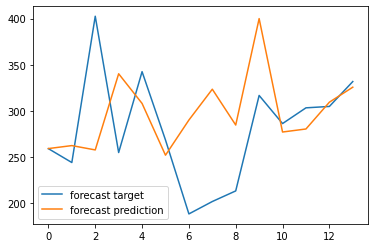

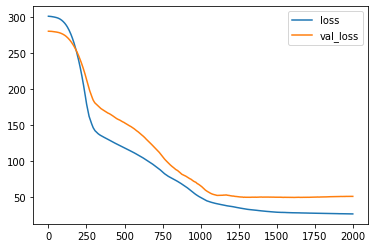

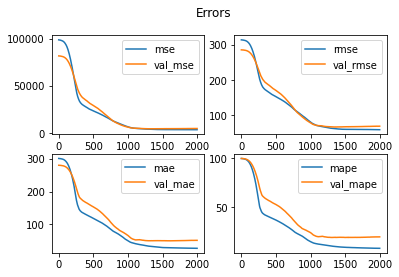

In [18]:
trainDFScaled, testDFScaled, trainDF, testDF = cargarData1()
trainXScaled, trainY, testXScaled, testY = generateFinalData(bestModel['delayedSteps'], 1, trainDFScaled, testDFScaled, trainDF, testDF)
trainXScaled, testXScaled = reshapeXdata(trainXScaled, testXScaled)
validation_target = testY[:]
validation_predictions = saved_model.predict(testXScaled[:,:])
fig, ax = plt.subplots(1, 1)
ax.plot(validation_target, label='forecast target')
ax.plot(validation_predictions, label='forecast prediction')
ax.legend()

plotLoss(history)
plotErrors(history)

##Generar data para NARMAX

In [21]:
def generateNarmaxData(dataScaled, data, delays, predictionHorizon, saved_model, columnTarget = 12):
  #Se hace una copia de los datos de entrada y agrega una columna con NA para los errores
  dataNarmax = data.copy()
  dataNarmax["error"] = np.nan
  dataNarmaxScaled = dataScaled.copy()
  dataNarmaxScaled["error"] = np.nan

  cantidadFilas = data.shape[0]
  indexAux = 0
  indexTarget = 0
  for _, row in data.iterrows():
    end_row = indexAux + delays
    indexTarget = end_row - 1 + predictionHorizon
    if indexTarget <= cantidadFilas-1:
      salidaAux = data.iloc[indexTarget, columnTarget]
      xAux = data.iloc[indexAux:end_row, :].values
      xAux = xAux.reshape(1,xAux.shape[0]*xAux.shape[1])
      prediction = float(saved_model.predict(xAux))
      error = mape(salidaAux, prediction)
      dataNarmax.iloc[indexTarget, columnTarget+1] = error
      dataNarmaxScaled.iloc[indexTarget, columnTarget+1] = error
    indexAux = indexAux + 1
  dataNarmax = dataNarmax.dropna()
  dataNarmaxScaled = dataNarmaxScaled.dropna()
  return dataNarmax, dataNarmaxScaled

In [22]:
dataTrainNarmax, dataTrainNarmaxScaled = generateNarmaxData(trainDFScaled, trainDF, bestModel['delayedSteps'], 1, saved_model)
dataTestNarmax, dataTestNarmaxScaled = generateNarmaxData(testDFScaled, testDF, bestModel['delayedSteps'], 1, saved_model)

In [23]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
std_scaler = StandardScaler()

dataTrainNarmaxScaled[['error']] = std_scaler.fit_transform(dataTrainNarmaxScaled[['error']])
dataTestNarmaxScaled[['error']] = std_scaler.fit_transform(dataTestNarmaxScaled[['error']])

In [24]:
dataTrainNarmax.to_csv('dataTrainNarmaxMLP.csv', index = False)
dataTrainNarmaxScaled.to_csv('dataTrainNarmaxScaledMLP.csv', index = False)
dataTestNarmax.to_csv('dataTestNarmaxMLP.csv', index = False)
dataTestNarmaxScaled.to_csv('dataTestNarmaxScaledMLP.csv', index = False)

In [25]:
dataTrainNarmax.iloc[:10,[0,1,12,13]]

Week_of_the_month  Day_of_the_week  Target_(Total_orders)         error
1                 1.0              5.0                224.675  1.349148e+06
2                 1.0              6.0                129.412  1.488332e+06
3                 2.0              2.0                317.120  2.241959e+05
4                 2.0              3.0                210.517  1.550162e+06
5                 2.0              4.0                207.364  1.594223e+06
6                 2.0              5.0                263.043  1.061022e+06
7                 2.0              6.0                248.958  1.351188e+06
8                 3.0              2.0                344.291  6.892097e+05
9                 3.0              3.0                248.428  1.234506e+06
10                3.0              4.0                281.420  8.756366e+05